**Description:** 

This notebook demonstrates the future price prediction for different stocks using recurrent neural networks in tensorflow. Recurrent neural networks with basic, LSTM or GRU cells are implemented. 

**Reference:**  
https://github.com/BenjiKCF/Neural-Net-with-Financial-Time-Series-Data

[LSTM_Stock_prediction-20170507 by BenF](https://www.kaggle.com/benjibb/lstm-stock-prediction-20170507/notebook)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/Applications/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/Users/huangchenchen/Desktop/Columbia/2018 Fall/Deep learning/Project: ['.DS_Store', '2D CNN.docx', 'Autoencoder', 'data', 'DL_FrameworkForFinnacialTimeSeries.pdf', 'L15 Exploding and Vanishing Gradients.pdf', 'LSTM', 'LSTM-Neural-Network-for-Time-Series-Prediction-master', 'LSTM.docx', 'Report Team G_Nov 13th.docx', 'Report Team G_Nov 13th.pdf', 'training-lstm', '~$port Team G_Nov 13th.docx']
/Users/huangchenchen/Desktop/Columbia/2018 Fall/Deep learning/Project/LSTM: ['.DS_Store', '.ipynb_checkpoints', 'LSTM papers and reference repos.docx', 'LSTM_10d.ipynb', 'LSTM_8d.ipynb', 'LSTM_9d.ipynb', 'LSTM_AE_10d.ipynb', 'LSTM_AE_8d.ipynb', 'LSTM_AE_9d.ipynb', 'LSTM_raw.ipynb', 'Raw_test_pred.png', 'RNN_sample2.ipynb', 'RNN_samplecode.ipynb', 'RNN_samplecode2.ipynb', 'Update_LSTM.docx']


# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- load index data from csv
- analyze data

In [2]:
# import all features
df = pd.read_csv("../data/update_stresult10-8-10.csv", index_col = 0)
df.head()

,Close,Open,a,b,c,d,e,f,g,h
index,,,,,,,,,,
1,1284.91,1276.69,0.301353,0.640791,0.319531,0.544267,0.325416,0.636948,0.658686,0.190075
2,1261.52,1285.82,0.286872,0.621444,0.353721,0.570246,0.331636,0.599680,0.663692,0.194192
3,1262.90,1262.96,0.304080,0.630921,0.371170,0.570606,0.349005,0.580057,0.622253,0.221415
4,1252.31,1262.90,0.313006,0.654169,0.354655,0.546161,0.379119,0.609835,0.547962,0.249331
5,1273.70,1251.84,0.331200,0.684320,0.336732,0.521930,0.414276,0.635603,0.459464,0.301588


In [3]:
df.tail()

,Close,Open,a,b,c,d,e,f,g,h
index,,,,,,,,,,
2075,2146.10,2158.54,0.333974,0.677025,0.353036,0.550499,0.406340,0.620349,0.495703,0.291709
2076,2159.93,2146.04,0.332899,0.721499,0.330007,0.505272,0.428610,0.654997,0.457972,0.300633
2077,2171.37,2161.85,0.360357,0.717792,0.322418,0.494426,0.429409,0.667271,0.403335,0.347162
2078,2151.13,2168.90,0.275748,0.699830,0.325254,0.536338,0.410431,0.642881,0.559726,0.241986
2079,2168.27,2156.51,0.297050,0.714409,0.316664,0.523125,0.419317,0.661402,0.518003,0.260718


In [4]:
df.describe()

,Close,Open,a,b,c,d,e,f,g,h
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000
mean,1510.099153,1509.691318,0.318938,0.680657,0.353062,0.540334,0.409663,0.621051,0.502115,0.284908
std,414.400699,414.273657,0.046436,0.031537,0.043282,0.036097,0.029028,0.050457,0.097808,0.069461
min,676.530000,679.280000,0.182031,0.547319,0.137199,0.403101,0.289031,0.387438,0.140668,0.114830
25%,1173.705000,1173.535000,0.288674,0.660781,0.327123,0.517746,0.396118,0.589628,0.444895,0.236713
50%,1402.890000,1402.580000,0.314396,0.679063,0.354369,0.543516,0.407077,0.618765,0.510982,0.275477
75%,1940.895000,1941.440000,0.345376,0.699106,0.379007,0.565755,0.420200,0.650837,0.568056,0.323830
max,2190.150000,2187.810000,0.526116,0.850617,0.581915,0.636639,0.664444,0.874320,0.812301,0.576684


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 1 to 2079
Data columns (total 10 columns):
Close    2079 non-null float64
Open     2079 non-null float64
a        2079 non-null float64
b        2079 non-null float64
c        2079 non-null float64
d        2079 non-null float64
e        2079 non-null float64
f        2079 non-null float64
g        2079 non-null float64
h        2079 non-null float64
dtypes: float64(10)
memory usage: 178.7 KB


# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- normalize stock data
- create train, validation and test data sets

In [6]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)
df.head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.401937,0.396021,0.346781,0.308185,0.409997,0.604468,0.096920,0.512465,0.771281,0.162919
1,0.386484,0.402074,0.304696,0.244397,0.486877,0.715708,0.113489,0.435920,0.778734,0.171833
2,0.387396,0.386920,0.354707,0.275642,0.526114,0.717252,0.159755,0.395618,0.717036,0.230776
3,0.380399,0.386880,0.380649,0.352292,0.488979,0.612580,0.239971,0.456777,0.606423,0.291220
4,0.394531,0.379548,0.433524,0.451703,0.448675,0.508820,0.333620,0.509702,0.474658,0.404365


In [7]:
# function for min-max normalization of stock (index)
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(np_scaled)
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

df_stock = df.copy()
cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 10 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x_train.shape =  (1655, 9, 10)
y_train.shape =  (1655, 10)
x_valid.shape =  (207, 9, 10)
y_valid.shape =  (207, 10)
x_test.shape =  (207, 9, 10)
y_test.shape =  (207, 10)


# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 
- RNNs with basic, LSTM, GRU cells


In [9]:
## Basic Cell RNN in tensorflow
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 10
n_neurons = 64 
n_outputs = 10
n_layers = 4  
learning_rate = 0.005
batch_size = 50 
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
#layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
    #      for layer in range(n_layers)]

# use Basic LSTM Cell 
layers = [tf.contrib.rnn.BasicLSTMCell(name='basic_lstm_cell',num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.185611/0.283416
4.98 epochs: MSE train/valid = 0.011852/0.014691
9.97 epochs: MSE train/valid = 0.011021/0.013571
14.95 epochs: MSE train/valid = 0.006279/0.007153
19.94 epochs: MSE train/valid = 0.006293/0.007288
24.92 epochs: MSE train/valid = 0.005836/0.006754
29.91 epochs: MSE train/valid = 0.006023/0.008243
34.89 epochs: MSE train/valid = 0.005783/0.006577
39.88 epochs: MSE train/valid = 0.005280/0.006866
44.86 epochs: MSE train/valid = 0.005272/0.007159
49.85 epochs: MSE train/valid = 0.005062/0.006698
54.83 epochs: MSE train/valid = 0.004683/0.006596
59.82 epochs: MSE train/valid = 0.004554/0.006659
64.80 epochs: MSE train/valid = 0.004295/0.007226
69.79 epochs: MSE train/valid = 0.004401/0.006962
74.77 epochs: MSE train/valid = 0.003839/0.007088
79.76 epochs: MSE train/valid = 0.003677/0.010635
84.74 epochs: MSE train/valid = 0.003386/0.008016
89.73 epochs: MSE train/valid = 0.002987/0.008425
94.71 epochs: MSE train/valid = 0.003051/0.008943
99.

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

In [10]:
y_train.shape

(1655, 10)

R_square:0.55
correct sign prediction for close - open price for train/valid/test: 0.59/0.50/0.50


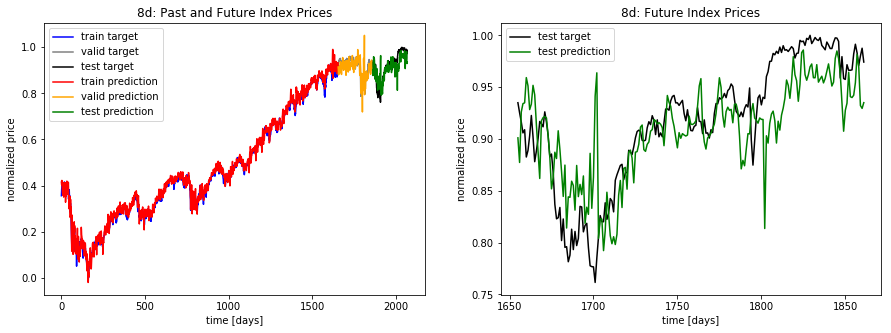

In [11]:
ft = 0 # 0 = close price

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('8d: Past and Future Index Prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('8d: Future Index Prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');
plt.savefig('8d_pred.png',dpi=600,bbox_inches="tight")
corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,0]-y_train[:,1]),
            np.sign(y_train_pred[:,0]-y_train_pred[:,1])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,0]-y_valid[:,1]),
            np.sign(y_valid_pred[:,0]-y_valid_pred[:,1])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,0]-y_test[:,1]),
            np.sign(y_test_pred[:,0]-y_test_pred[:,1])).astype(int)) / y_test.shape[0]

# Calculate R square
SumRes = np.sum((y_test_pred[:,0] - y_test[:,0])**2)
Sumvar = np.var(y_test[:,0])*y_test.shape[0]
R_sq = 1 - SumRes/Sumvar
print('R_square:%.2f'% R_sq)
print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()